<a href="https://colab.research.google.com/github/JV-Machado/big_mart_sales_prediction/blob/master/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import zipfile
# with zipfile.ZipFile('/content/drive/MyDrive/Data Science Projects/Big Mart Sales Prediction/big_mart_sales_dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Data Science Projects/Big Mart Sales Prediction/data')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Big Mart Sales Prediction/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Big Mart Sales Prediction/data/test.csv')

# **Explorando a base de dados**

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.select_dtypes(exclude='number').apply(lambda x: len(x.unique()))

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
object_columns = df.select_dtypes(exclude='number').columns
object_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for column in object_columns:
  print(df[column].value_counts())
  print("<==================================================>")
  print("\n")

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
<==================================================>


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
<==================================================>


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
<==================================================>


OUT027    935
OUT013    93

# Informações coletadas

**Notas para o dataset:**



*   Dispõe de dados numéricos e categóricos;
*   Possui 8523 linhas (datapoints) para 12 colunas (features);
*   Há 1559 itens únicos para 10 diferentes mercados;
*   Contém 16 categorias de itens.




**Informações Importantes:**


*   Colunas 'Item_Weight' e 'Outlet_Size' possuem valores nulos;
*   Já que são vários mercados, então o mesmo identificador pode se repetir, o que pode ser usado para preencher as linhas nulas de 'Item_Weight', caso exista pelo menos um identificador contendo a informação;
*   A coluna 'Item_Fat_Content' não está devidamente padronizada, possui basicamente 2 classes, 'Low Fat' e 'Regular', porém, na base de dados aparecem também as classes 'low fat', 'LF' e 'reg';
*   A coluna 'Item_Fat_Content' não consta itens não consumíveis, no entanto, observando os 'Item_Identifiers' percebe-se que que há três tipos de identificador 'FD', 'DR' e 'NC', que podem indicar, respectivamente, 'Food', 'Drink' e 'Non-Consumable'
*   Alguns itens possuem visibilidade 0, portanto são outliers.



**Correções a serem realizadas:**


*   Inserir o valor 'Not Specified' nas linhas nulas da coluna 'Outlet_Size';
*   Preencher os valores nulos da coluna 'Item_Weight' com o valor do respectivo identificador;
*   Padronizar a coluna 'Item_Fat_Content' com os valores 'Low Fat', 'Regular' e 'Non-Consumable';
*   Substituir as linhas da coluna 'Item_Visibility' que possuem valor 0 pela média geral dos valores presentes na coluna.



# Preenchendo linhas NaN da coluna 'Item_Weight'

In [ ]:
fill_weight = df.groupby(['Item_Identifier'])['Item_Weight'].first()
df['Item_Weight'].fillna(df['Item_Identifier'].map(fill_weight), inplace = True)

In [ ]:
fill_weight_with_test = df_test.groupby(['Item_Identifier'])['Item_Weight'].first()
df['Item_Weight'].fillna(df['Item_Identifier'].map(fill_weight_with_test), inplace = True)

In [ ]:
df['Item_Weight'].isna().sum()

0

# Preenchendo linhas NaN da coluna 'Outlet_Size'

In [ ]:
df['Outlet_Size'].fillna("Not Specified", inplace=True)

In [ ]:
df['Outlet_Size'].isna().sum()

0

# Substituindo os 0s da coluna 'Item_Visibility'

In [ ]:
temp = df.loc[df['Item_Visibility'] != 0]
mean = temp['Item_Visibility'].mean()
mean

0.07048184085069402

In [ ]:
df.loc[df['Item_Visibility'] == 0, 'Item_Visibility'] = mean

# Padronizando valores distoantes da coluna 'Item_Fat_Content'

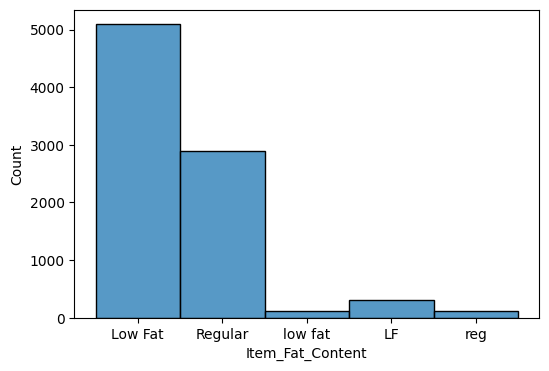

In [ ]:
plt.figure(figsize=(6,4))

sns.histplot(df['Item_Fat_Content'])
plt.show()

In [ ]:
for content in df['Item_Fat_Content'].unique():
  count = df.loc[df['Item_Fat_Content'] == content, 'Item_Fat_Content'].count()
  print(f"{content}: {count}")

Low Fat: 5089
Regular: 2889
low fat: 112
LF: 316
reg: 117


In [ ]:
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [ ]:
for content in df['Item_Fat_Content'].unique():
  count = df.loc[df['Item_Fat_Content'] == content, 'Item_Fat_Content'].count()
  print(f"{content}: {count}")

Low Fat: 5517
Regular: 3006


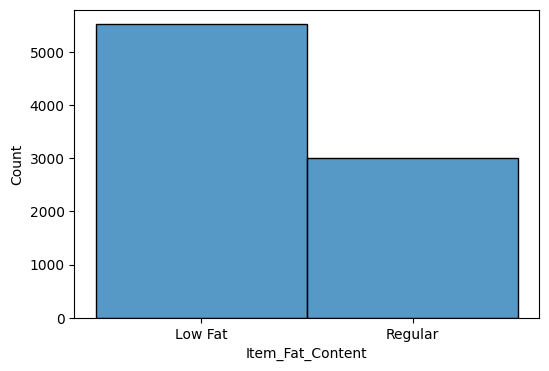

In [ ]:
plt.figure(figsize=(6,4))

sns.histplot(df['Item_Fat_Content'])
plt.show()

In [ ]:
aux = df['Item_Identifier'].str[0:2]
df.loc[aux == 'NC', 'Item_Fat_Content'] = 'Non-Consumable' 

In [ ]:
for content in df['Item_Fat_Content'].unique():
  count = df.loc[df['Item_Fat_Content'] == content, 'Item_Fat_Content'].count()
  print(f"{content}: {count}")

Low Fat: 3918
Regular: 3006
Non-Consumable: 1599


# Exibindo o dataset corrigido

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873623,0.070482,140.992782,1997.831867,2181.288914
std,4.645893,0.048730,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


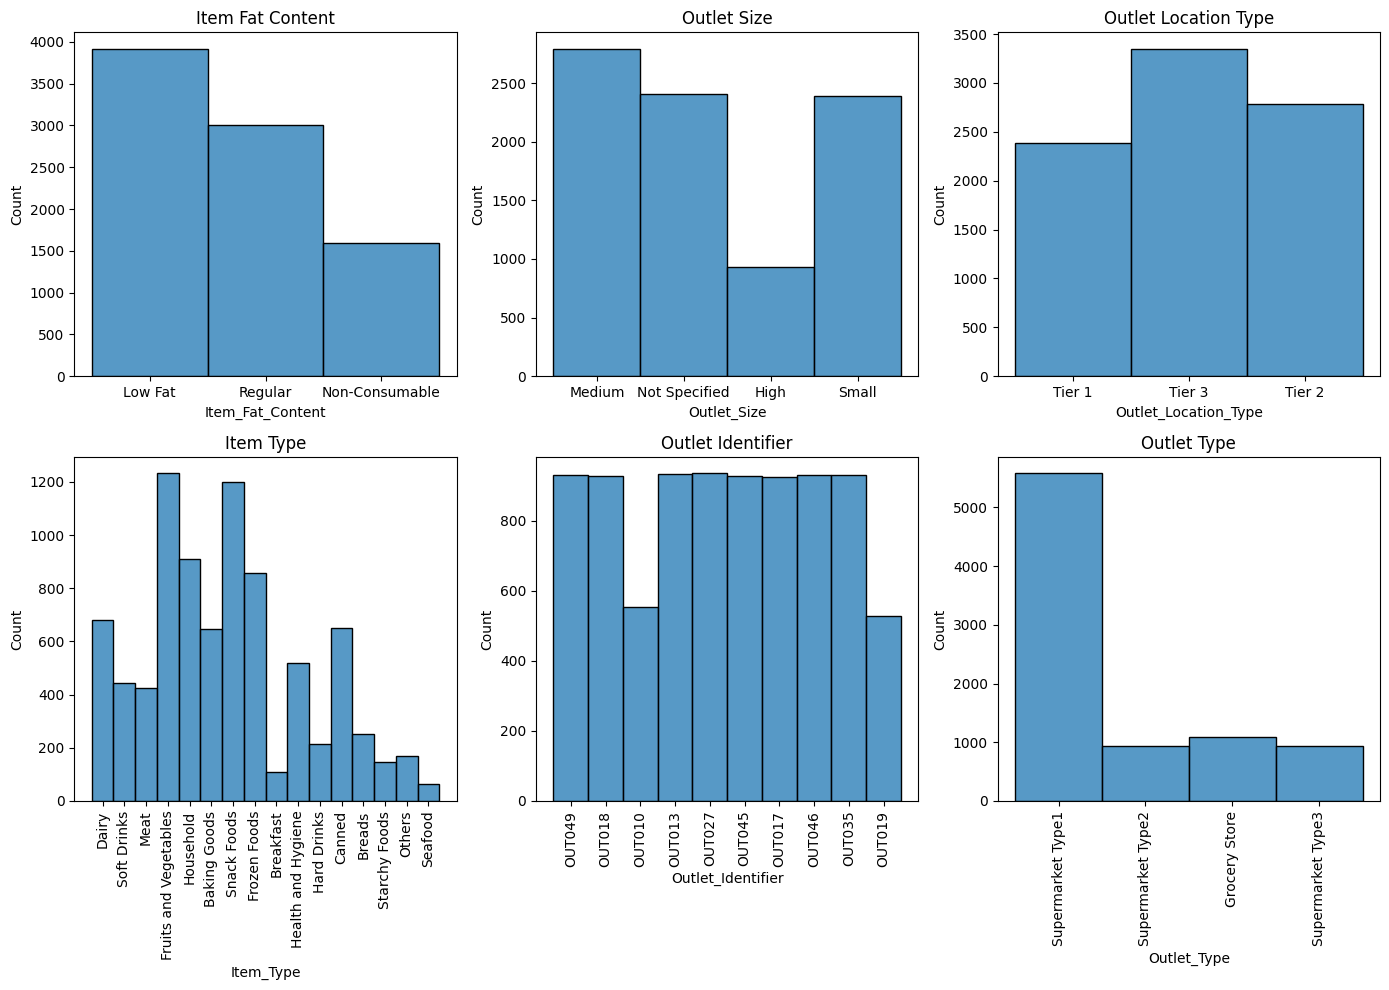

In [ ]:
plt.figure(figsize=(14,10))

plt.subplot(2,3,1)
sns.histplot(df['Item_Fat_Content'])
plt.title("Item Fat Content")

plt.subplot(2,3,2)
sns.histplot(df['Outlet_Size'])
plt.title("Outlet Size")

plt.subplot(2,3,3)
sns.histplot(df['Outlet_Location_Type'])
plt.title("Outlet Location Type")

plt.subplot(2,3,4)
sns.histplot(df['Item_Type'])
plt.xticks(rotation=90)
plt.title("Item Type")

plt.subplot(2,3,5)
sns.histplot(df['Outlet_Identifier'])
plt.xticks(rotation=90)
plt.title("Outlet Identifier")

plt.subplot(2,3,6)
sns.histplot(df['Outlet_Type'])
plt.xticks(rotation=90)
plt.title("Outlet Type")

plt.tight_layout()

plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/Data Science Projects/Big Mart Sales Prediction/data/data.csv', index=False)

# Treinamento

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Not Specified,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Non-Consumable,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
encoder = LabelEncoder()

for col in object_columns:
  print(encoder.fit_transform(df[col]))
  df[col] = encoder.fit_transform(df[col])
  df_test[col] = encoder.fit_transform(df_test[col])

[ 156    8  662 ... 1357  681   50]
[0 2 0 ... 1 2 0]
[ 4 14 10 ...  8 13 14]
[9 3 9 ... 6 3 8]
[1 1 1 ... 3 1 3]
[0 2 0 ... 1 2 0]
[1 2 1 ... 1 2 1]


In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.070482,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,1,0.070482,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,3,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [ ]:
# for col in object_columns:
#   df[col] = pd.factorize(df[col])[0]
#   df_test[col] = pd.factorize(df_test[col])[0]

In [ ]:
X = df.drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year'])
Y = df['Item_Outlet_Sales']

In [ ]:
def classifier(X, Y, model):

  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(f"RMSE = {rmse}")

  r2 = r2_score(y_test, y_pred)
  print(f"R² = {r2}")

In [ ]:
classifier(X, Y, LinearRegression())

RMSE = 1145.3579192775157
R² = 0.5337244010611357


In [ ]:
classifier(X, Y, RandomForestRegressor())

RMSE = 1082.43377303785
R² = 0.5835499571501376


In [ ]:
classifier(X, Y, MLPRegressor(random_state=1, max_iter=500))

RMSE = 1138.1705562200902
R² = 0.5395579958270309


In [ ]:
score = cross_val_score(LinearRegression(), X, Y, cv=10, scoring='r2')
print('R²= ', np.mean(score))

R²=  0.5006915896447998
